In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

Train Data

In [4]:
df_train=pd.read_csv('TaxiFare.csv' ,nrows=50000 , parse_dates=["date_time_of_pickup"])

Exploratory Data Analysis

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [6]:
df_train.describe()

amount  longitude_of_pickup  latitude_of_pickup  \
count  50000.000000         50000.000000        50000.000000   
mean      11.364171           -72.509756           39.933759   
std        9.685557            10.393860            6.224857   
min       -5.000000           -75.423848          -74.006893   
25%        6.000000           -73.992062           40.734880   
50%        8.500000           -73.981840           40.752678   
75%       12.500000           -73.967148           40.767360   
max      200.000000            40.783472          401.083332   

       longitude_of_dropoff  latitude_of_dropoff  no_of_passenger  
count          50000.000000         50000.000000     50000.000000  
mean             -72.504616            39.926251         1.667840  
std               10.407570             6.014737         1.289195  
min              -84.654241           -74.006377         0.000000  
25%              -73.991152            40.734372         1.000000  
50%              -73.980082            40.753372         1.000000  
75%              -73.963584            40.768167         2.000000  
max               40.851027            43.415190         6.000000

In [7]:
df_train.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

Data Pre-Processing

In [8]:
df_train=df_train[df_train["amount"]>=0]

In [9]:
len(df_train)

49994

Histogram of fare amount

C:\Users\omprj\AppData\Local\Temp\ipykernel_16096\2083943000.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["amount"] , kde=False);


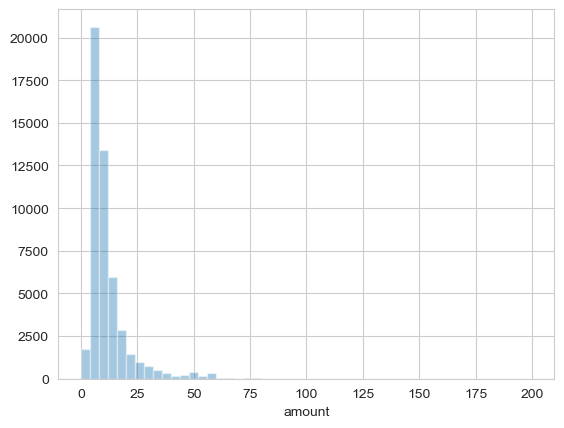

In [10]:
sns.distplot(df_train["amount"] , kde=False);

C:\Users\omprj\AppData\Local\Temp\ipykernel_16096\1585782850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train["amount"]<60]["amount"], kde=False )


<Axes: xlabel='amount'>

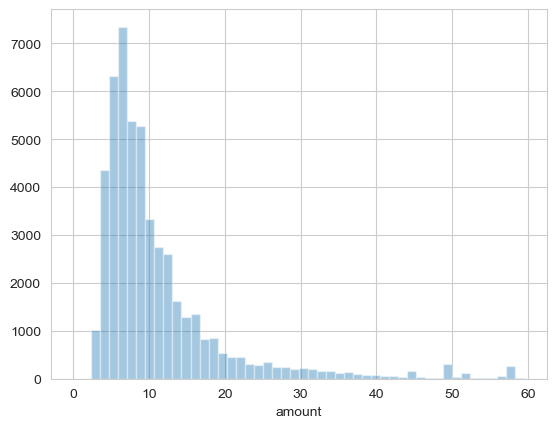

In [11]:
sns.distplot(df_train[df_train["amount"]<60]["amount"], kde=False )

Remove missing data

In [12]:
print(df_train.isnull().sum())

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64


In [13]:
df_train=df_train.dropna(how='any',axis='rows')

In [14]:
len(df_train)

49994

Test Data

In [15]:
df_test=pd.read_csv("TaxiFare.csv")

In [16]:
df_test.head(5)

unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1   52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2   35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3   30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4   51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  
0                1  
1                1  
2                2  
3                1  
4                1

In [17]:
df_train.describe()

amount  longitude_of_pickup  latitude_of_pickup  \
count  49994.000000         49994.000000        49994.000000   
mean      11.365903           -72.509586           39.933665   
std        9.684843            10.394472            6.225225   
min        0.000000           -75.423848          -74.006893   
25%        6.000000           -73.992062           40.734883   
50%        8.500000           -73.981840           40.752679   
75%       12.500000           -73.967153           40.767361   
max      200.000000            40.783472          401.083332   

       longitude_of_dropoff  latitude_of_dropoff  no_of_passenger  
count          49994.000000         49994.000000     49994.000000  
mean             -72.505922            39.926970         1.667860  
std               10.403131             6.012441         1.289213  
min              -84.654241           -74.006377         0.000000  
25%              -73.991152            40.734375         1.000000  
50%              -73.980082            40.753373         1.000000  
75%              -73.963585            40.768167         2.000000  
max               40.851027            43.415190         6.000000

New York city cordinates are https://latlong.info/united-states/new-york/new-york-city

In [18]:
latitude=40.71427000    
longitude= -74.00597000  

here will try to define bounding box of interest by long_min.latt_min,
latt_max using maximum and minimum cordinates from dataset

**minimum and maximum longitude test set**

In [19]:
print(min(df_test["longitude_of_pickup"].min(),df_test["longitude_of_dropoff"].min()))

-84.654241


In [20]:
print(max(df_test["longitude_of_pickup"].max(),df_test["longitude_of_dropoff"].max()))

40.851027


In [21]:
print(max(df_train["longitude_of_pickup"].max(),df_train["longitude_of_dropoff"].max()))

40.851027


In [22]:
print(min(df_train["longitude_of_pickup"].min(),df_train["longitude_of_dropoff"].min()))

-84.654241


**function for selecting the bounding box**

In [23]:
def select_within_boundingbox(df, BB):
    return (
        (df["longitude_of_pickup"] >= BB[0]) & (df["longitude_of_pickup"] <= BB[1]) &
        (df["latitude_of_pickup"] >= BB[2]) & (df["latitude_of_pickup"] <= BB[3]) &
        (df["longitude_of_dropoff"] >= BB[0]) & (df["longitude_of_dropoff"] <= BB[1]) &
        (df["latitude_of_dropoff"] >= BB[2]) & (df["latitude_of_dropoff"] < BB[3])
    )



load img of nyc map for visualization

In [24]:
#BB=(-74.0 ,-73.0 ,40.0 ,41.7)
BB = (-74.3, -73.0, 40.6, 41.7)

In [25]:
#nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')
nyc_map = plt.imread('newyork.png')

In [26]:
nyc_map

array([[[1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ]],

       [[0.05490196, 0.05490196, 0.05490196, 1.        ],
        [0.05490196, 0.05490196, 0.05490196, 1.        ],
        [0.05490196, 0.05490196, 0.05490196, 1.        ],
        ...,
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ]],

       [[0.05490196, 0.05490196, 0.05490196, 1.        ],
        [0.05490196, 0.05490196, 0.05490196, 1.        ],
        [0.05490196, 0.05490196, 0.05490196, 1.        ],
        ...,
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.984313

In [27]:
df_train = df_train[select_within_boundingbox(df_train, BB)]

In [28]:
print("New size {}".format(len(df_train)))

New size 48898


Function will be used for plotting data on NYC Map

In [29]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1,2,figsize=(16, 10))
    axs[0].scatter(df["longitude_of_pickup"], df["latitude_of_pickup"], alpha = alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup Locations')
    axs[0].imshow(nyc_map, extent=BB)
    
    axs[1].scatter(df["longitude_of_dropoff"], df["latitude_of_dropoff"] , alpha = alpha, c='b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff Locations')
    axs[1].imshow(nyc_map, extent=BB)

Plotting Training Data on map

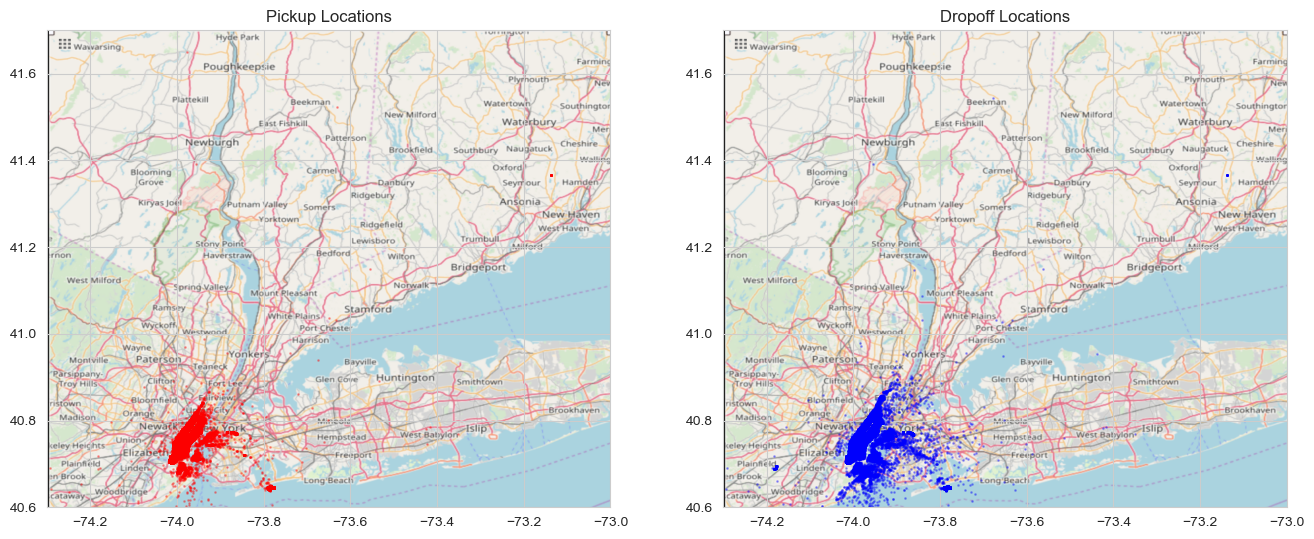

In [30]:
plot_on_map(df_train, BB, nyc_map, s=1, alpha=0.3)

Plotting testing Data on Map

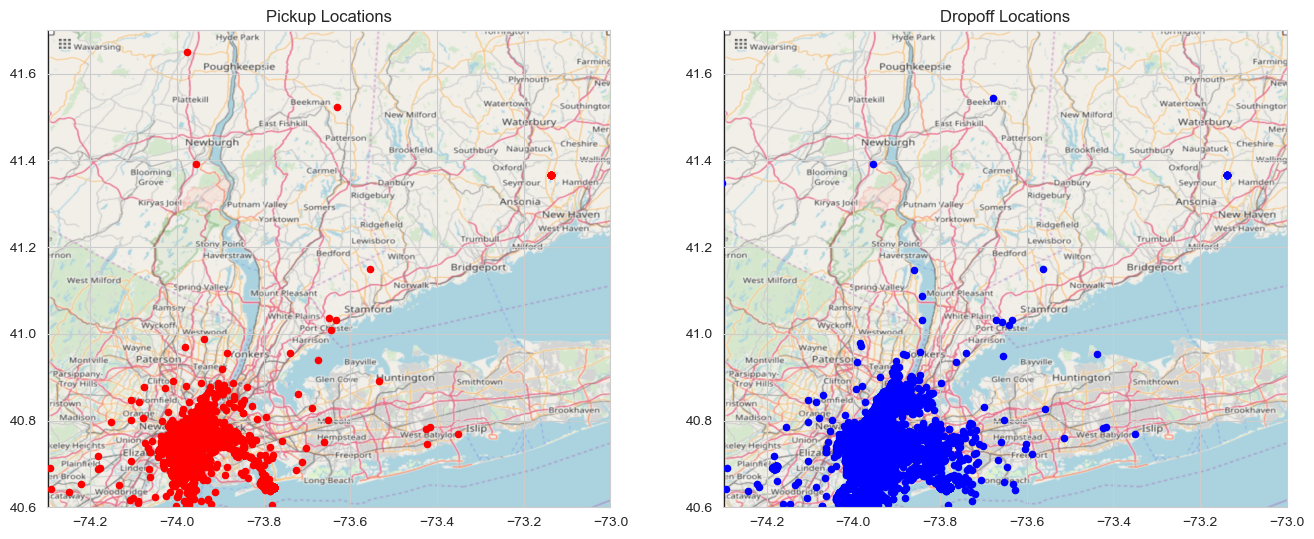

In [31]:
plot_on_map(df_test, BB, nyc_map, alpha=1.0, s=20)

Scatter Plot

In [32]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].longitude_of_pickup, df[idx].latitude_of_pickup, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].longitude_of_dropoff, df[idx].latitude_of_dropoff, c=c[1], s=0.01, alpha=0.5)

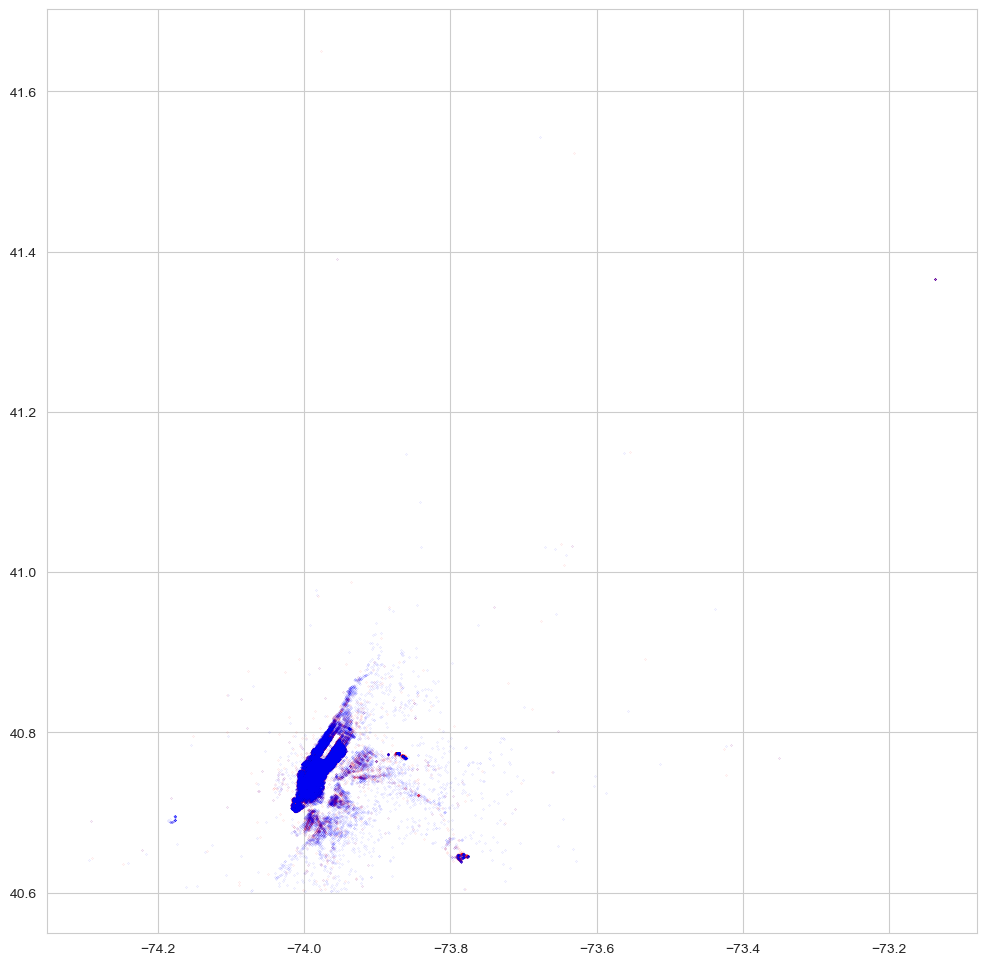

In [33]:
plot_hires(df_train, BB)

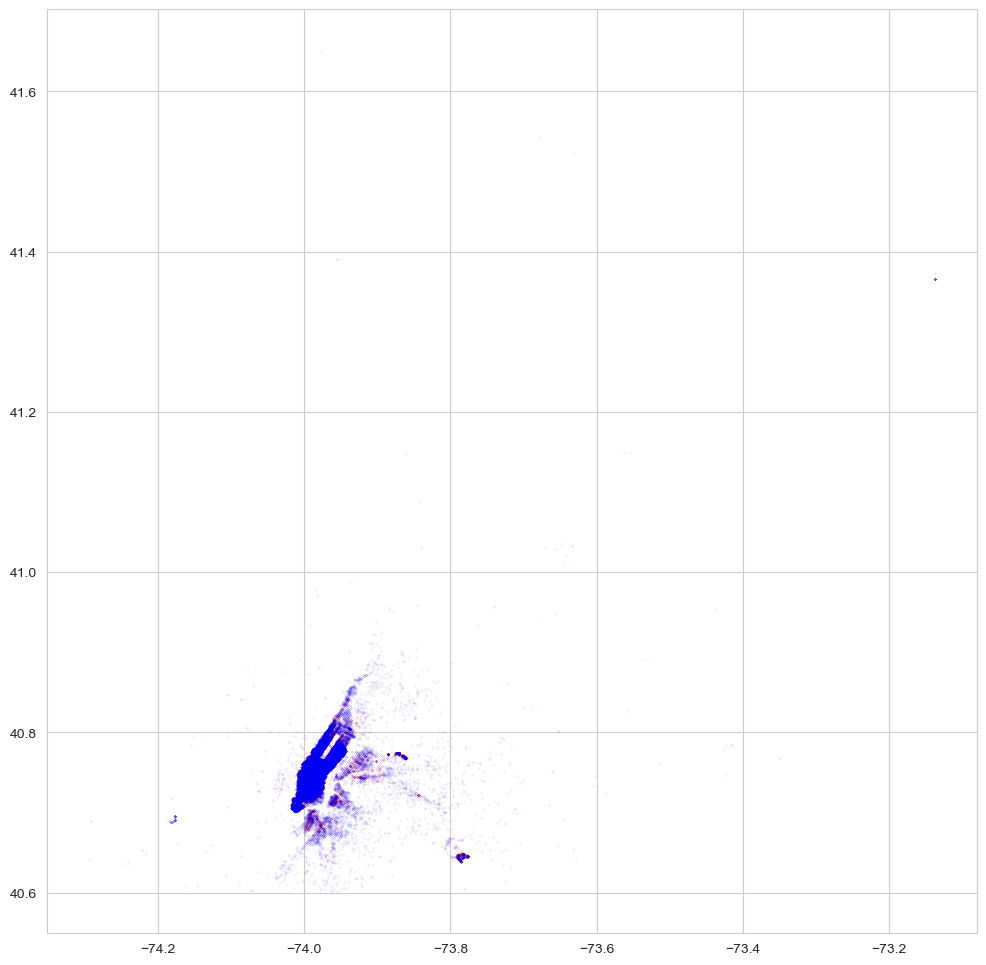

In [34]:
plot_hires(df_test, BB)

In [35]:
# add time information
df_train['year'] = df_train["date_time_of_pickup"].apply(lambda t: t.year)
df_train['weekday'] = df_train["date_time_of_pickup"].apply(lambda t: t.weekday())
df_train['hour'] = df_train["date_time_of_pickup"].apply(lambda t: t.hour)

**Distance and Time Visualization
The longer the distance between pickup and dropoff locations, the higher the fare.
Some trips, like to/from an airport are fixed fee.
Fare at night is different from the day time.**

Formula to be used for calculating the distance between latitude and longitude we use haversine formula here

In [36]:
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

The longer the distance between pickup and dropoff location, higher the fare. Adding new column to dataframe with distance in miles

In [37]:
df_train["distance_miles"] = distance(df_train["latitude_of_pickup"], df_train["longitude_of_pickup"], 
                                      df_train["latitude_of_pickup"], df_train["longitude_of_dropoff"])

In [38]:
df_train.head(5)

unique_id  amount       date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5 2009-06-15 17:26:21+00:00           -73.844311   
1   52:16.0    16.9 2010-01-05 16:52:16+00:00           -74.016048   
2   35:00.0     5.7 2011-08-18 00:35:00+00:00           -73.982738   
3   30:42.0     7.7 2012-04-21 04:30:42+00:00           -73.987130   
4   51:00.0     5.3 2010-03-09 07:51:00+00:00           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  year  weekday  hour  distance_miles  
0                1  2009        0    17        0.141439  
1                1  2010        1    16        1.926284  
2                2  2011        3     0        0.445047  
3                1  2012        5     4        0.232303  
4                1  2010        1     7        0.598638

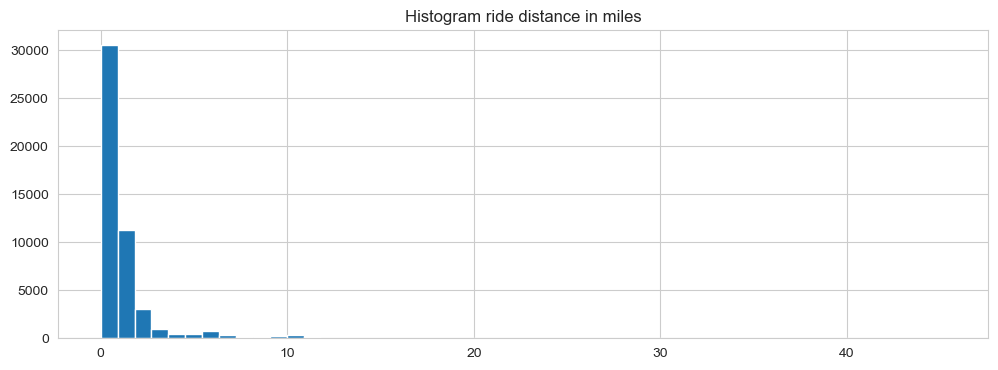

In [39]:
df_train["distance_miles"].hist(bins=50, figsize=(12,4))
plt.title("Histogram ride distance in miles");

In [40]:
df_train["distance_miles"].describe()

count    48898.000000
mean         1.202878
std          1.885428
min          0.000000
25%          0.320374
50%          0.668805
75%          1.265569
max         45.315546
Name: distance_miles, dtype: float64

It seems most rides are just short rides, with a small peak at ~11 miles. This peak could be due to airport drives.

In [41]:
df_train.groupby('no_of_passenger')['distance_miles','amount'].mean()

C:\Users\omprj\AppData\Local\Temp\ipykernel_16096\3819866770.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_train.groupby('no_of_passenger')['distance_miles','amount'].mean()


distance_miles     amount
no_of_passenger                           
0                      1.073688   9.489308
1                      1.177982  11.184856
2                      1.314518  11.992286
3                      1.158081  11.221176
4                      1.160929  11.376552
5                      1.224043  11.292593
6                      1.330786  12.441990

Scatter Plot distance vs Fare

Text(0.5, 1.0, 'Zoom in on distance < 15 mile and fare < $100')

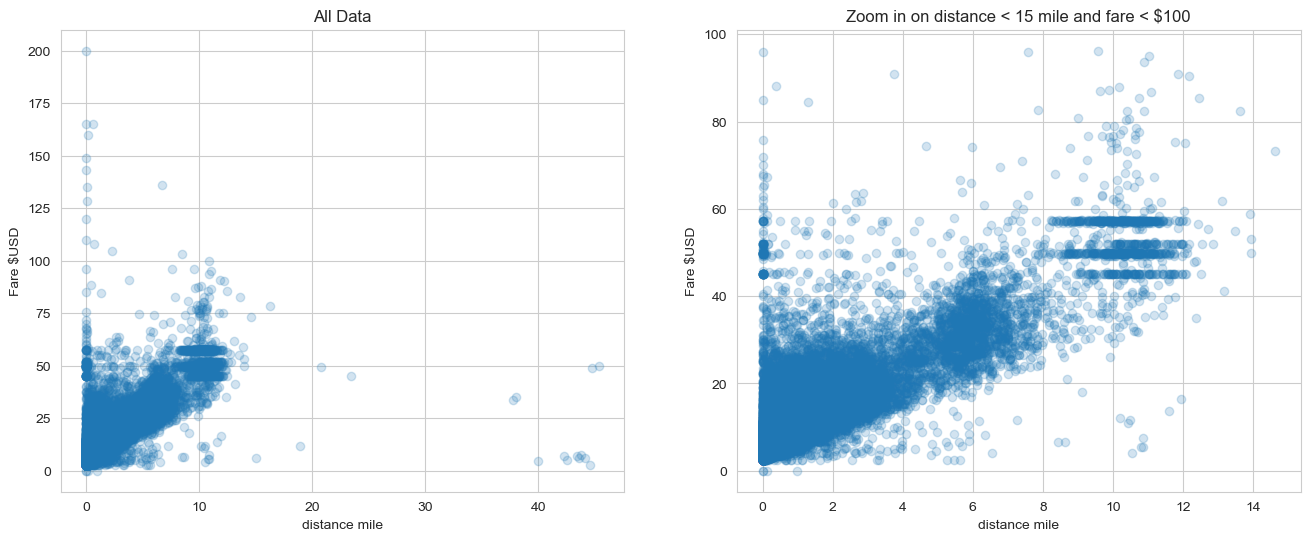

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(df_train["distance_miles"], df_train["amount"], alpha=0.2)
axs[0].set_xlabel("distance mile")
axs[0].set_ylabel("Fare $USD")
axs[0].set_title("All Data")

# Zoom-in some part of the data
idx = ((df_train['distance_miles'] < 15) & (df_train["amount"] < 100))
axs[1].scatter(df_train[idx]["distance_miles"], df_train[idx]["amount"], alpha=0.2)
axs[1].set_xlabel("distance mile")
axs[1].set_ylabel("Fare $USD")
axs[1].set_title("Zoom in on distance < 15 mile and fare < $100")

**Few Obervations -**

1]There are trips with zero distance but with a non-zero fare. Could this be trips from and to the 
same location? Predicting these fares will be difficult as there is likely not sufficient information in the dataset.

2]There are some trips with >50 miles travel distance but low fare. 
Perhaps these are discounted trips.

3]The horizontal lines in the right plot might indicate again the fixed fare trips
to/from JFK airport. Overall there seems to be a (linear) relation between distance and fare with an average 
rate of +/- 100/20 = 5 $USD/mile

In [43]:
# remove datapoints with distance <0.05 miles
idx = (df_train["distance_miles"] >= 0.05)
print('Old size: %d' % len(df_train))
df_train = df_train[idx]
print('New size: %d' % len(df_train))

Old size: 48898
New size: 46423


JKF airport coordinates, see https://www.travelmath.com/airport/JFK

In [44]:
jfk = (-73.7822222222,40.6441666667)
nyc = (-74.0063889, 40.7141667)

In [45]:
def plot_location_fare(loc, name, range=1.5):
    # select all datapoints with dropoff location within range of airport
    fig, axs = plt.subplots(1,2, figsize=(14,5))
    idx = (distance(df_train["latitude_of_pickup"], df_train["longitude_of_pickup"], loc[1], loc[0]) < range)
    df_train[idx]["amount"].hist(bins = 100, ax=axs[0])
    axs[0].set_xlabel("Fare $USD")
    axs[0].set_title("Histogram pickup location within {} miles of {}".format(range, name))
    
    idx = (distance(df_train["latitude_of_pickup"], df_train["longitude_of_pickup"], loc[1], loc[0]) < range)
    df_train[idx]["amount"].hist(bins=100, ax=axs[1])
    axs[1].set_xlabel("Fare $USD")
    axs[1].set_title("Histogram dropoff location within {} miles of {}".format(range, name))

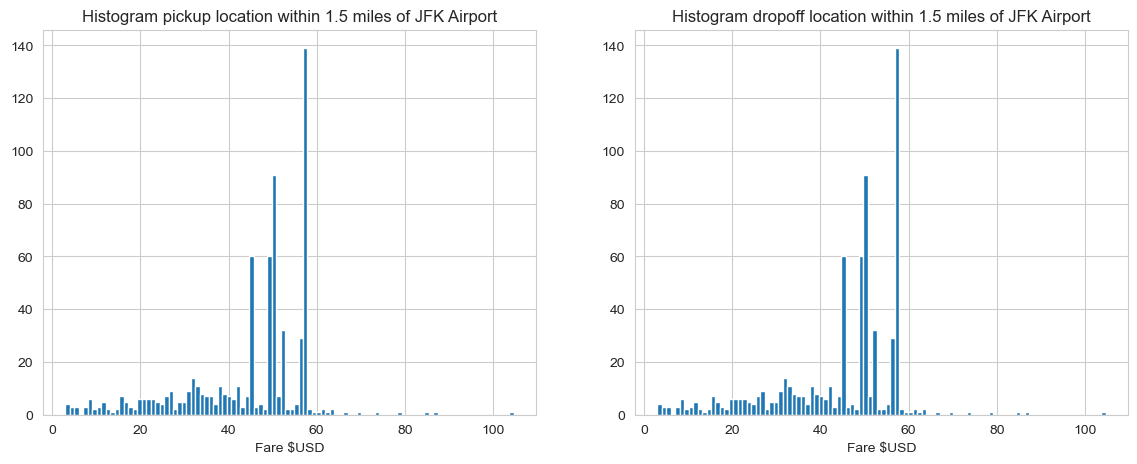

In [46]:
plot_location_fare(jfk, 'JFK Airport')

In [47]:
#Other Airports
lgr = (-73.87, 40.77) #Laguardia Airport, https://www.travelmath.com/airport/LGA

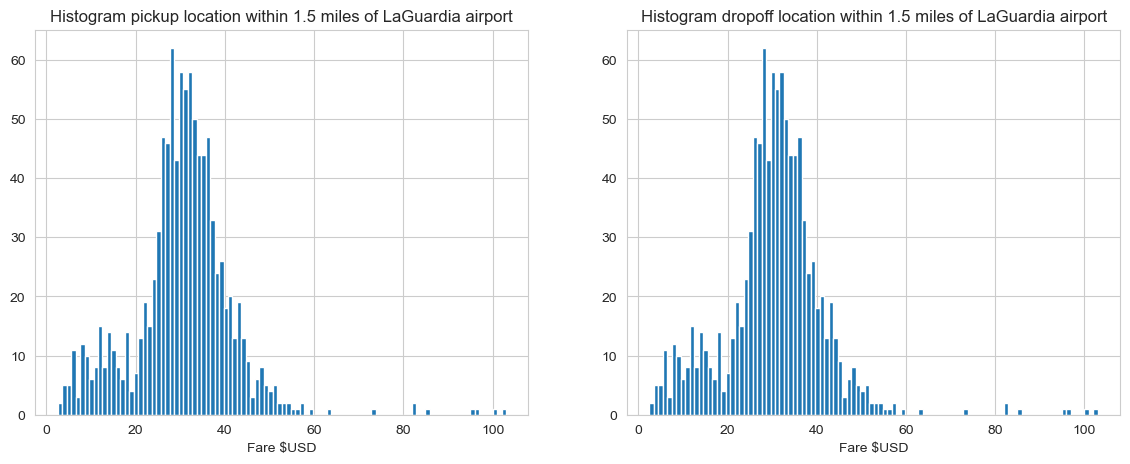

In [48]:
plot_location_fare(lgr, 'LaGuardia airport')

Fare at night is different from the day time

In [49]:
df_train["fare_per_mile"] = df_train["amount"] / df_train["distance_miles"]

In [50]:
df_train["fare_per_mile"].describe()

count    46423.000000
mean        19.375827
std         28.187978
min          0.000000
25%          7.814738
50%         11.091347
75%         18.929157
max       1450.431352
Name: fare_per_mile, dtype: float64

Text(0, 0.5, 'fare per distance in mile')

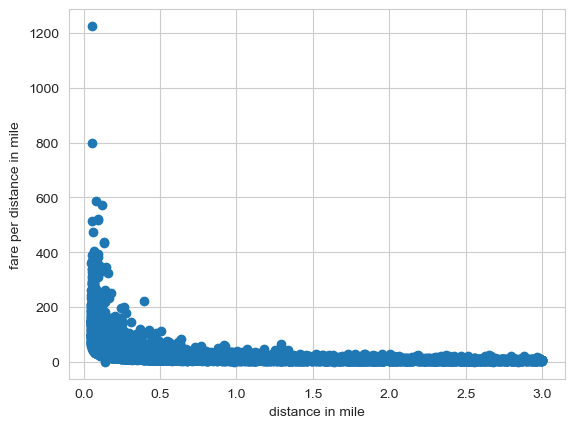

In [51]:
idx = (df_train["distance_miles"] < 3) & (df_train["amount"] < 100)
plt.scatter(df_train[idx]["distance_miles"], df_train[idx]["fare_per_mile"])
plt.xlabel("distance in mile")
plt.ylabel("fare per distance in mile")

pivot table

In [52]:
df_train.pivot_table("fare_per_mile", index="hour", columns="year")

year       2009       2010       2011       2012       2013       2014  \
hour                                                                     
0     16.407113  19.306975  17.052201  19.935162  20.427606  23.510858   
1     18.717603  17.900789  22.043859  20.921302  18.173375  20.872708   
2     16.047790  19.109884  21.788041  16.977744  21.178449  22.045706   
3     17.033590  15.295164  18.039266  21.243757  19.293379  20.761563   
4     14.660244  14.427282  17.065790  11.660800  17.819950  13.641729   
5     12.070299  12.610341  12.425389  12.521953  16.271119  21.847170   
6     13.708632  17.270753  14.219540  14.166141  15.494523  15.814978   
7     16.308534  15.240018  15.819236  14.606679  18.962498  17.735511   
8     16.064443  16.752760  21.213537  17.776330  20.671076  20.341619   
9     20.090246  19.021501  18.500338  18.752524  21.218670  19.309009   
10    19.301283  20.134406  17.662427  19.548911  26.911476  20.922211   
11    18.713984  18.960018  17.141376  18.910291  23.848362  21.364828   
12    18.660003  17.249476  18.404303  21.687349  21.438121  24.518144   
13    18.166046  20.171311  18.902487  22.106718  23.602335  20.192658   
14    18.166820  17.422097  16.540309  21.758816  19.846743  23.780705   
15    15.222453  20.180375  17.525006  19.468441  22.513951  19.810089   
16    17.819428  19.738538  17.056241  18.713859  20.044672  21.480942   
17    18.633075  20.073253  18.881314  17.465574  21.005922  24.058359   
18    22.931832  19.779256  17.564759  19.393210  21.270653  26.550990   
19    17.266338  17.326298  17.977067  19.249050  19.435644  19.373107   
20    18.220339  16.502285  19.454909  18.050652  19.225634  20.556945   
21    18.142040  19.269654  18.215898  19.057207  21.874304  20.696019   
22    17.692702  16.565448  18.319140  20.096811  18.703171  18.220381   
23    19.395504  16.570765  18.292644  19.751594  20.113323  19.003686   

year       2015  
hour             
0     20.842645  
1     20.867798  
2     29.493597  
3     16.040660  
4     18.266712  
5     15.176398  
6     16.097677  
7     21.028079  
8     19.731910  
9     21.606467  
10    23.925280  
11    20.079007  
12    22.445525  
13    24.535700  
14    22.353898  
15    23.843468  
16    16.165356  
17    18.647065  
18    26.576520  
19    20.805072  
20    18.640553  
21    22.124318  
22    25.963439  
23    22.259084

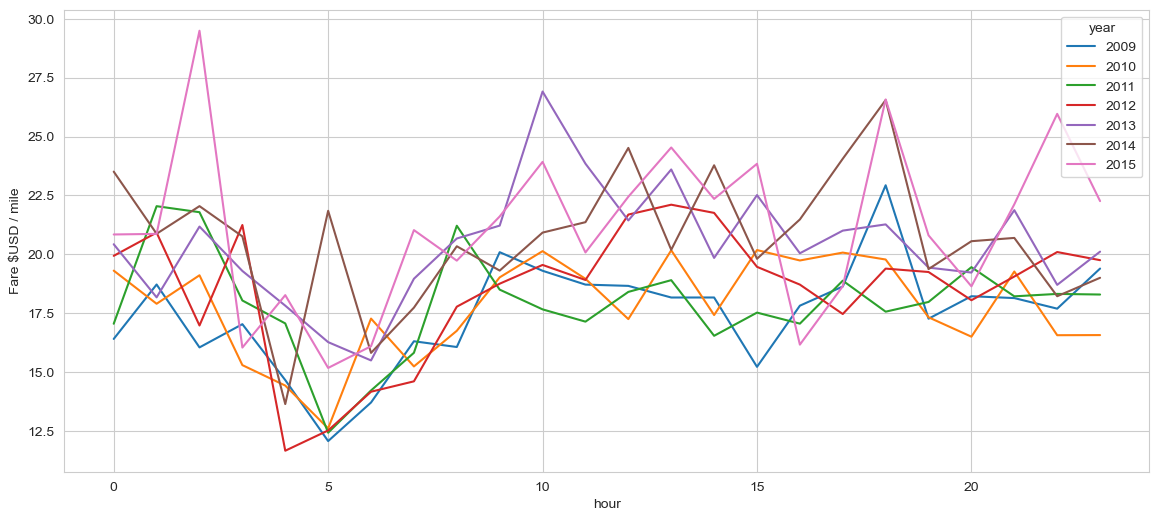

In [53]:
df_train.pivot_table("fare_per_mile", index="hour", columns="year").plot(figsize=(14,6))
plt.ylabel("Fare $USD / mile");

Fare and Time Dependency Per Year

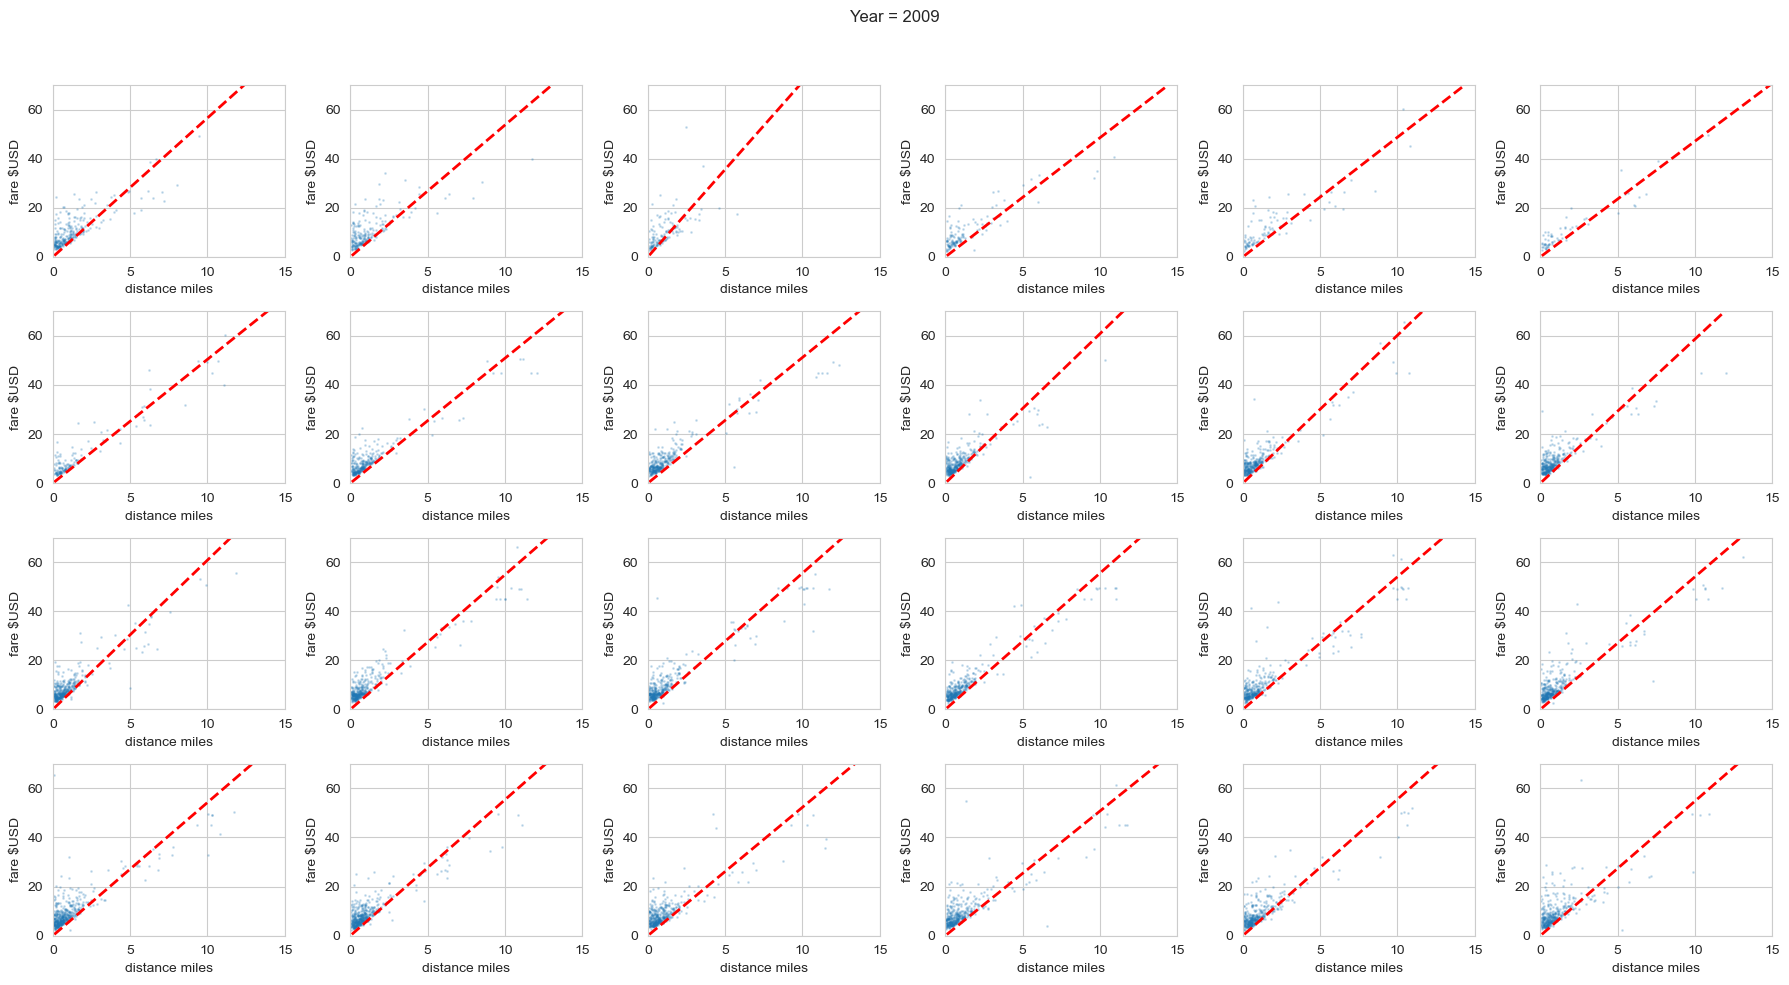

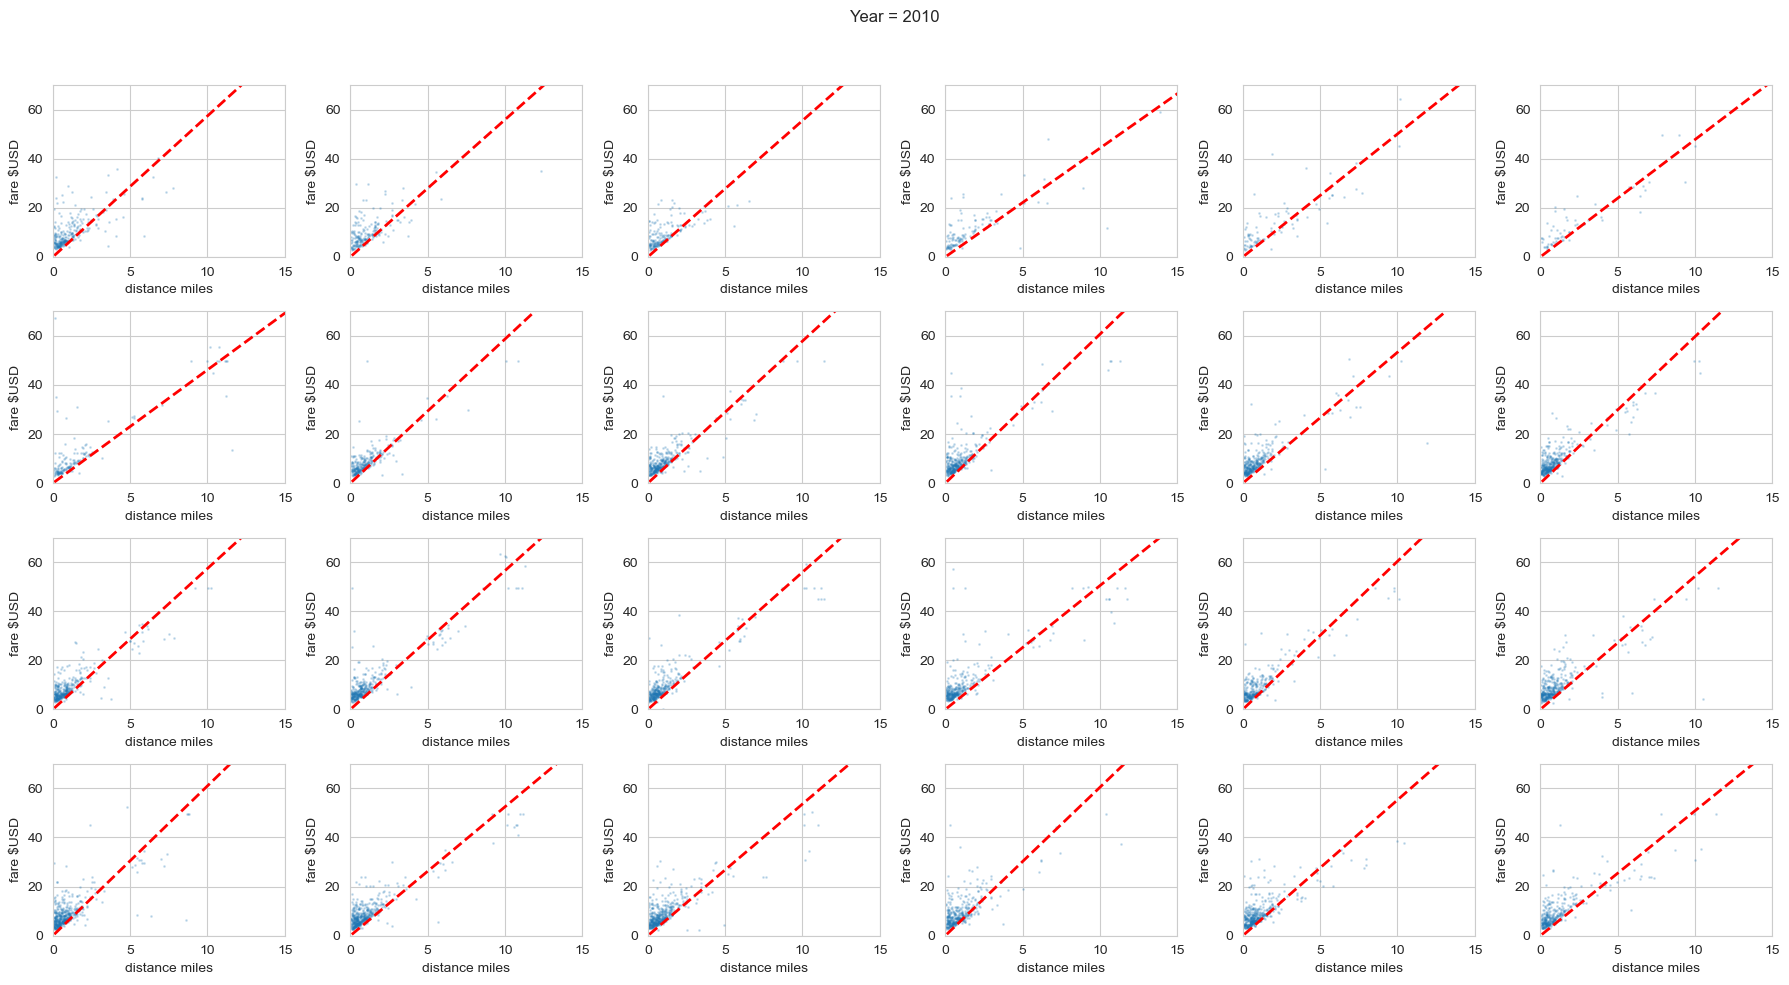

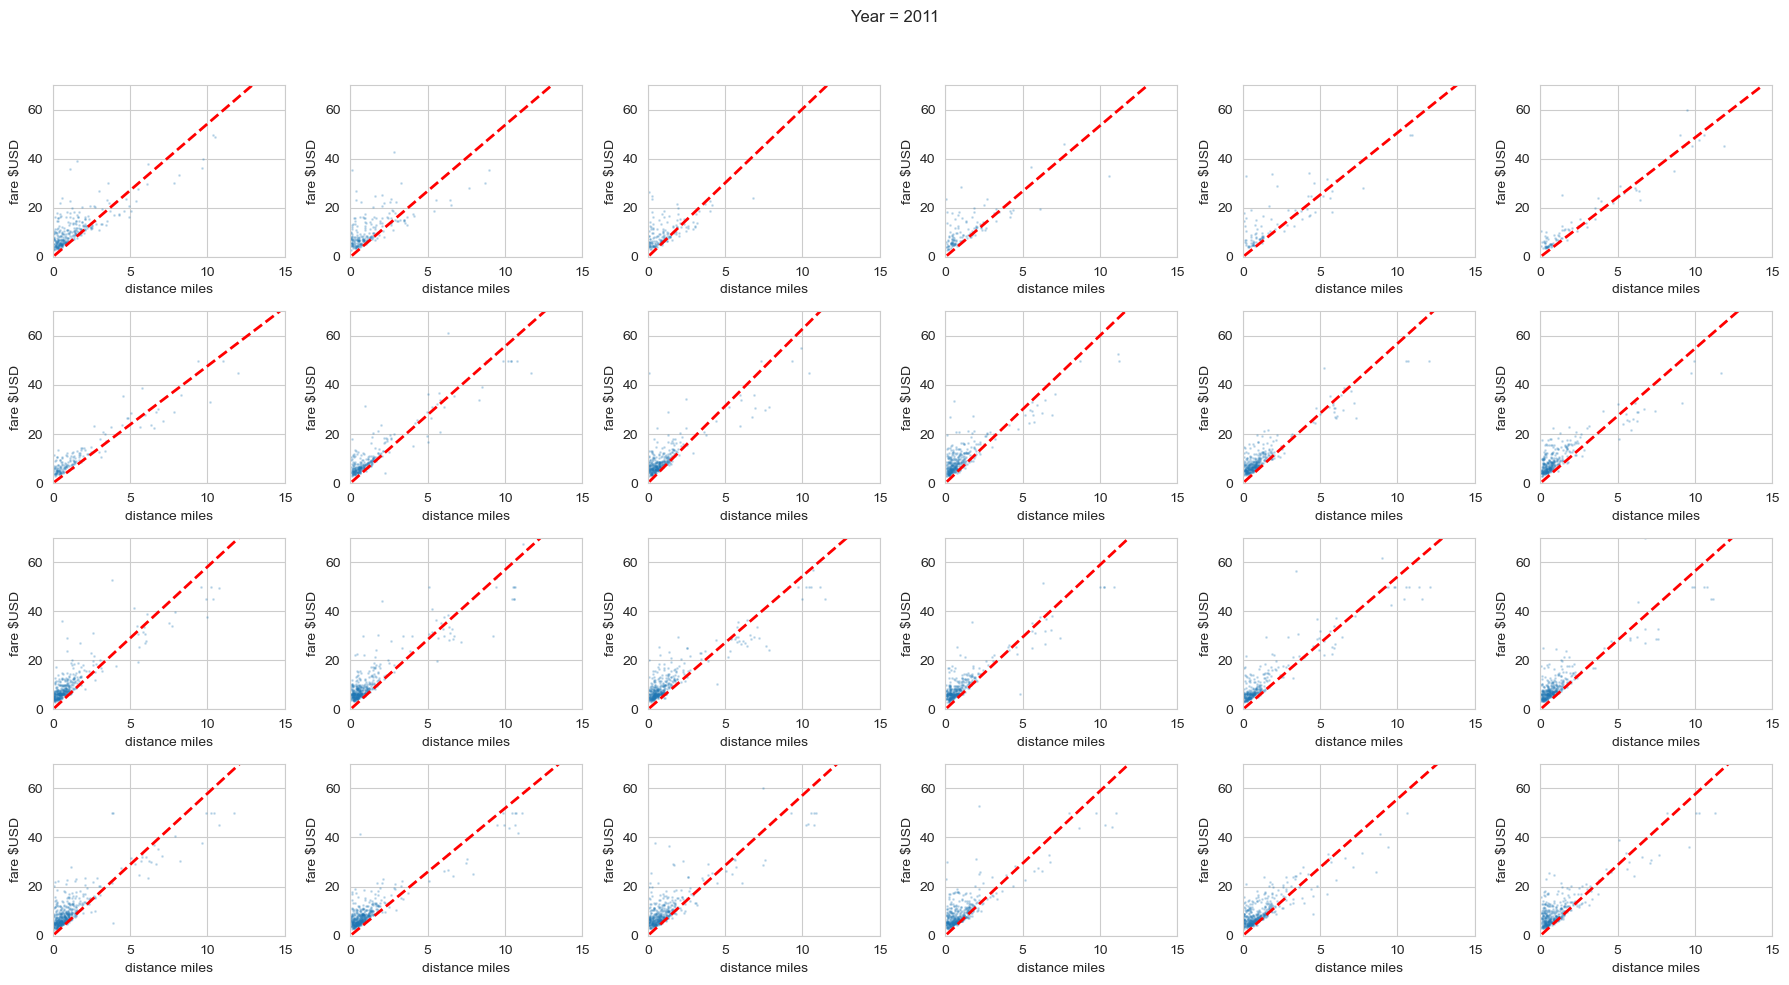

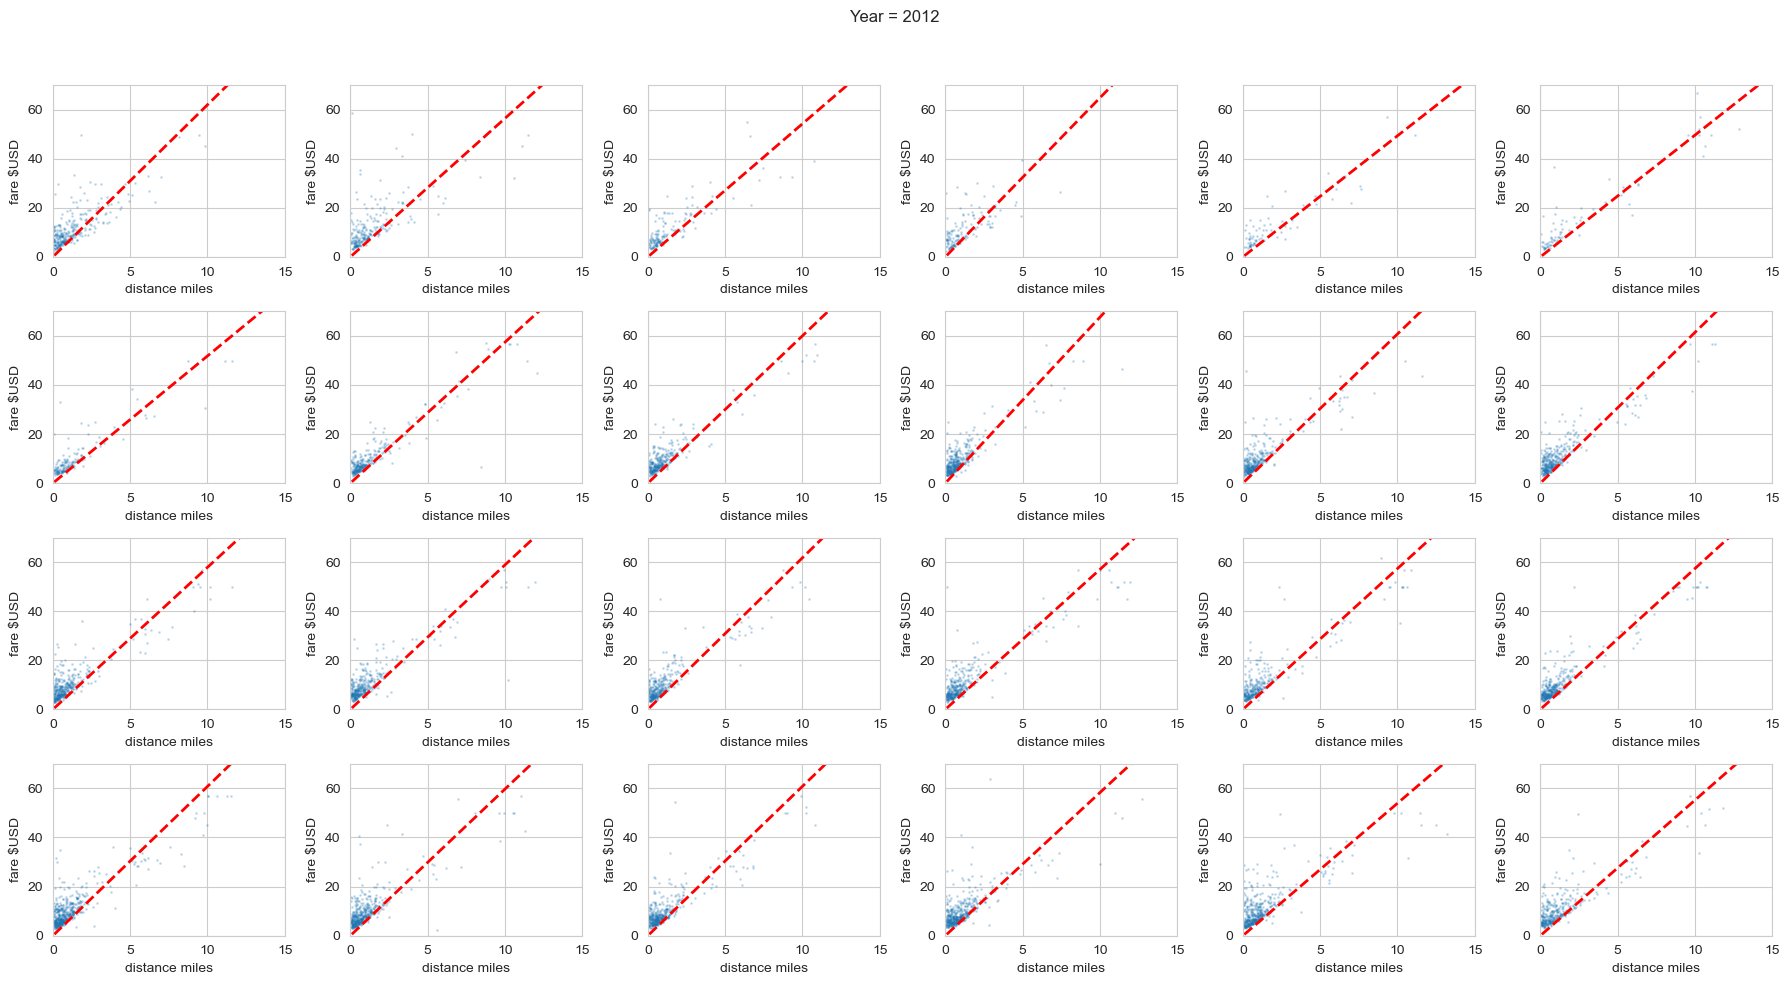

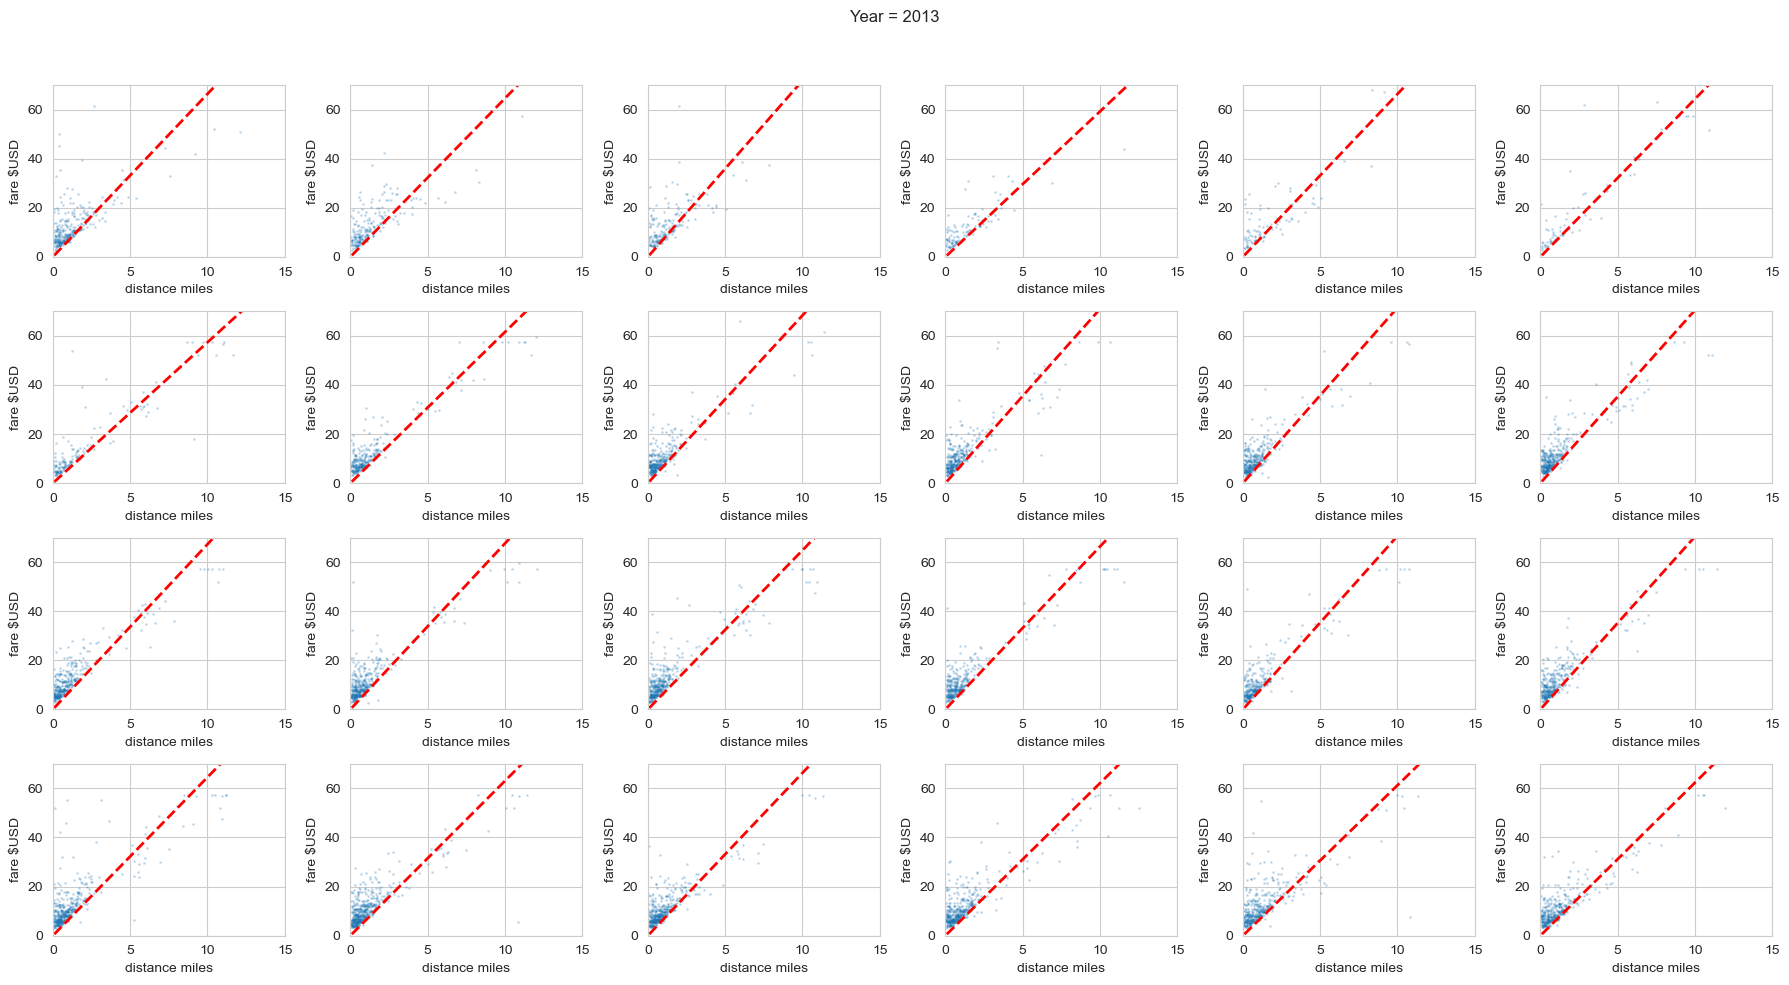

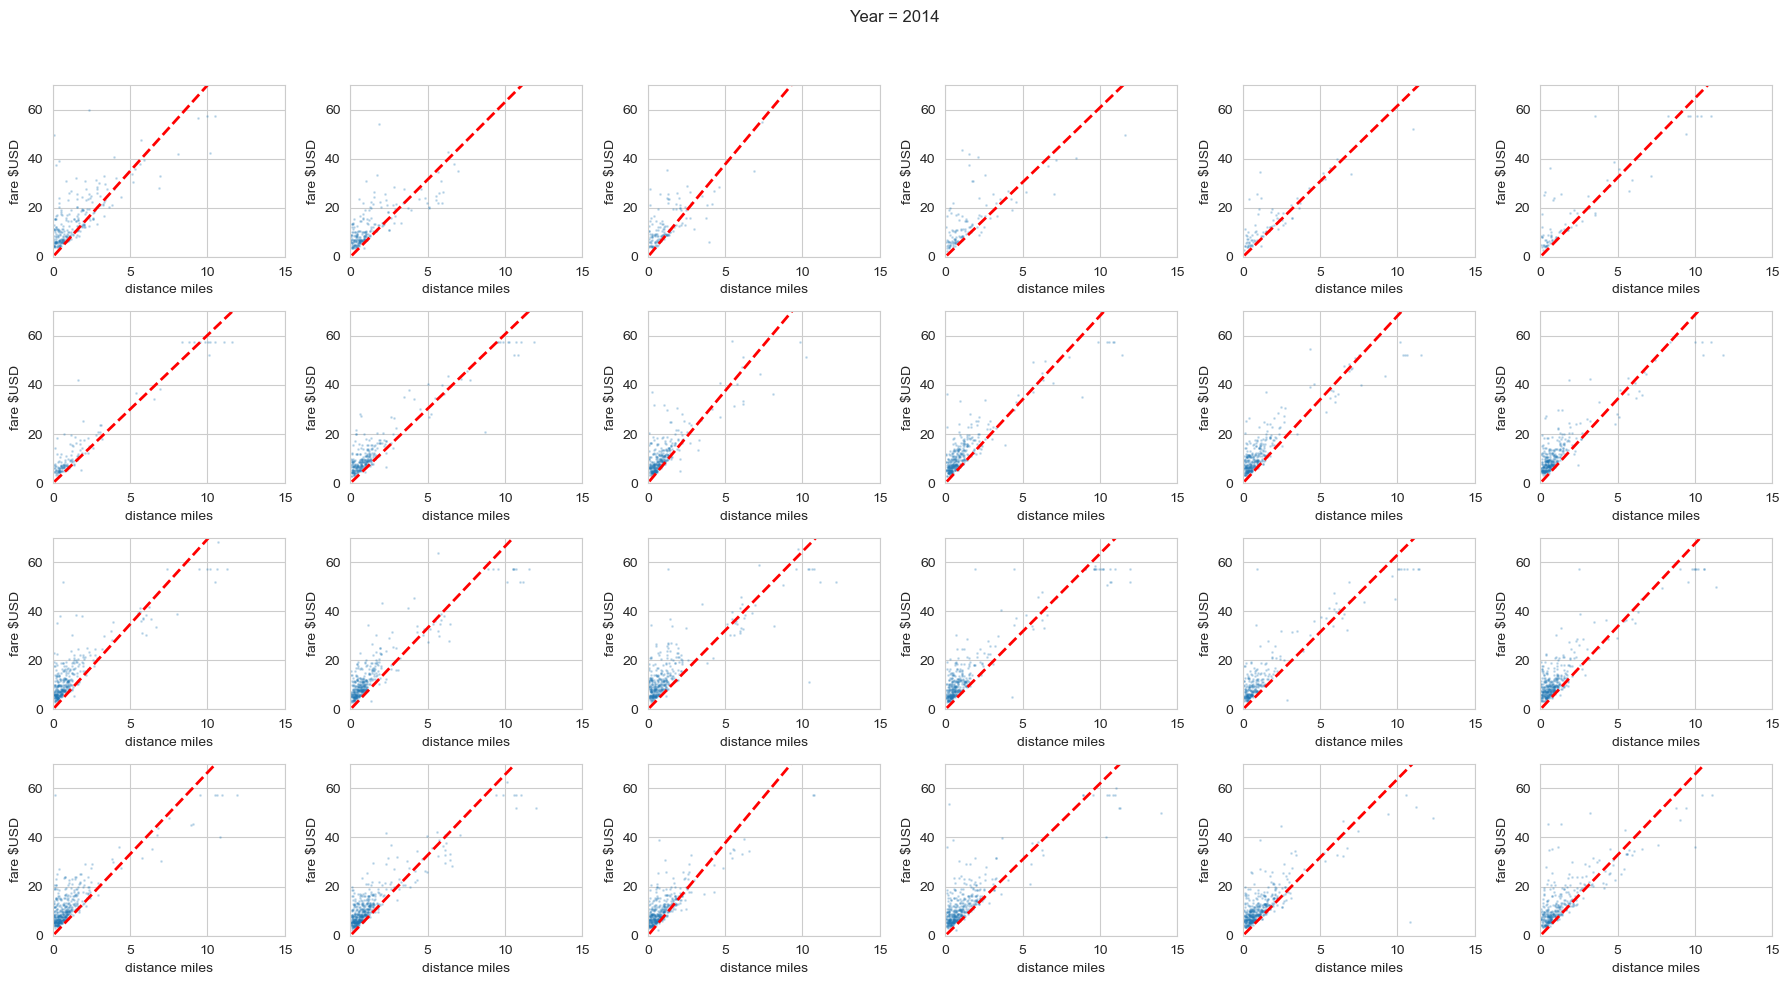

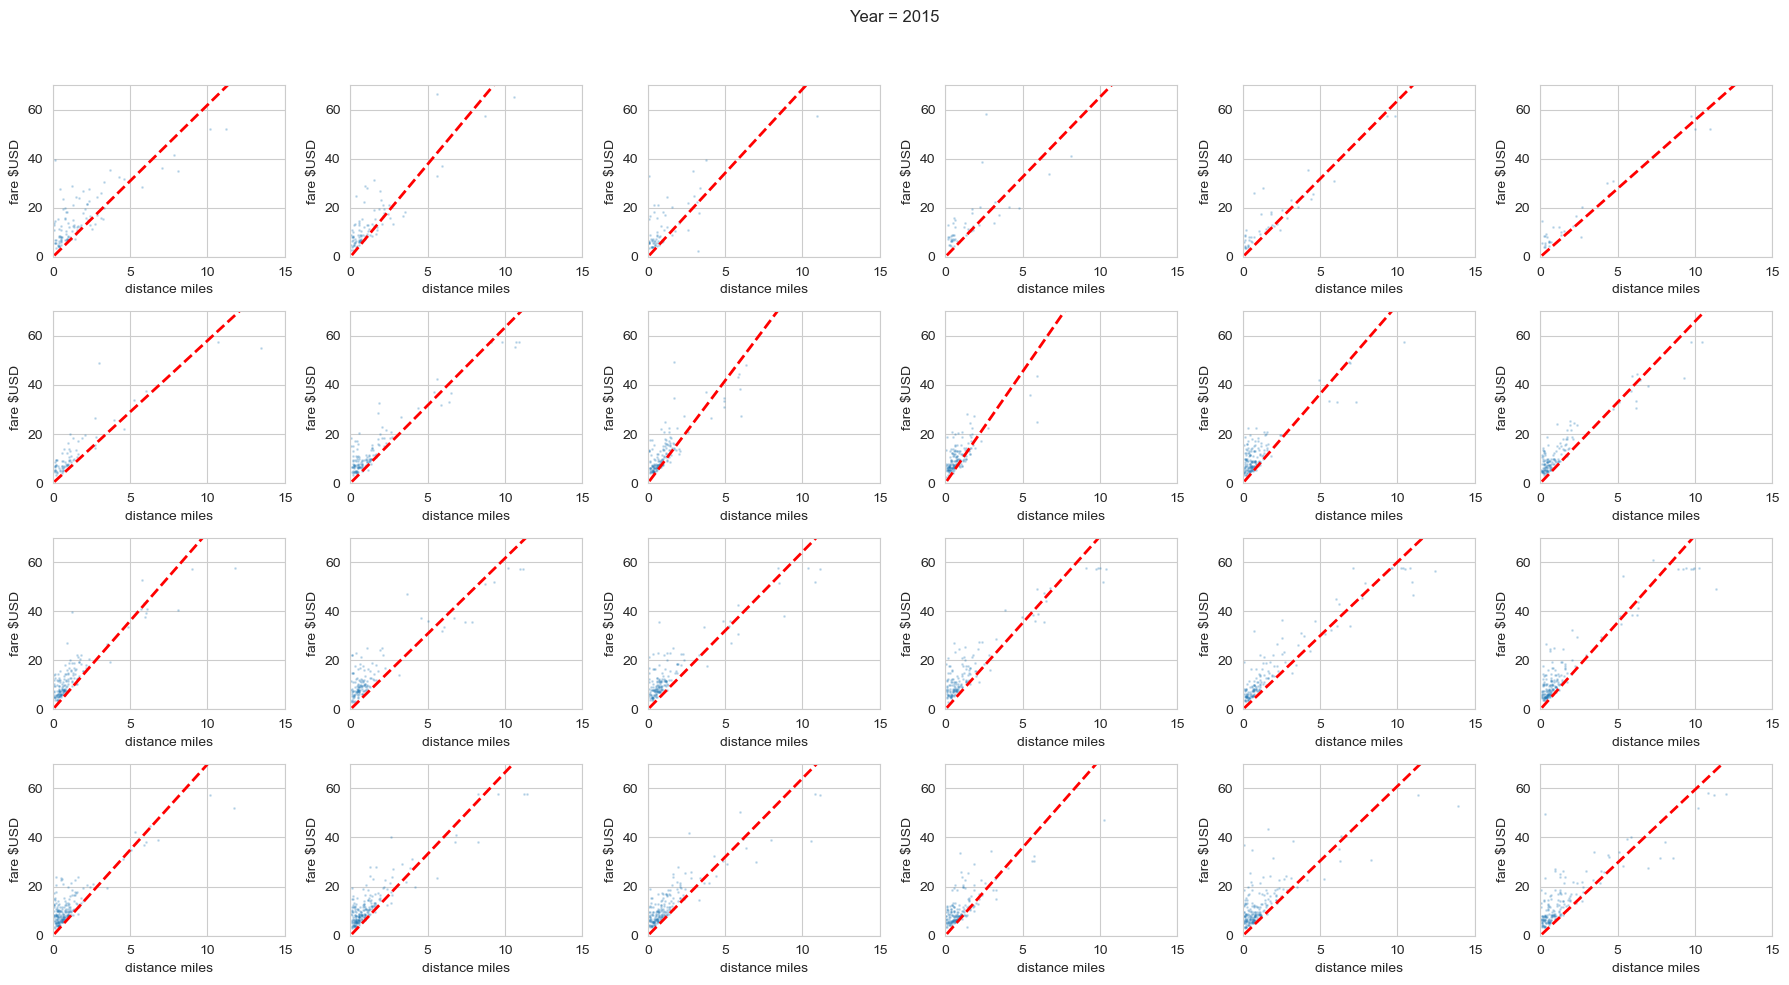

In [54]:
from sklearn.linear_model import LinearRegression

# plot all years
for year in df_train["year"].unique():
    
    # create figure
    fig, axs = plt.subplots(4, 6, figsize=(18, 10))
    axs = axs.ravel()
    
    # plot for all hours
    
    for h in range(24):
        idx = (df_train["distance_miles"] < 15) & (df_train["amount"] < 100) & (df_train["hour"] == h) & \
              (df_train["year"] == year)
        axs[h].scatter(df_train[idx]["distance_miles"], df_train[idx]["amount"], alpha=0.2, s=1)
        axs[h].set_xlabel('distance miles')
        axs[h].set_ylabel('fare $USD')
        axs[h].set_xlim((0, 15))
        axs[h].set_ylim((0, 70))
        
        model = LinearRegression(fit_intercept=False)
        
        X, y = df_train[idx]["distance_miles"].values.reshape(-1,1), df_train[idx]["amount"].values
        model.fit(X, y)
        xx = np.linspace(0.1, 25, 100)
        axs[h].plot(xx, model.predict(xx.reshape(-1,1)), '--', c='r', lw=2)
        
    plt.suptitle("Year = {}".format(year))
    plt.tight_layout(rect=[0, 0, 1, 0.95]);

**Relevance of direction for calculation of fare amount**

In [55]:
df_train["delta_lon"] = df_train["longitude_of_pickup"] - df_train["longitude_of_dropoff"]
df_train["delta_lat"] = df_train["latitude_of_pickup"] - df_train["latitude_of_dropoff"]

select trips in manhatten

In [56]:
BB_manhattan = (-74.025, -73.925, 40.7, 40.8)
idx_manhattan = select_within_boundingbox(df_train, BB_manhattan)

Text(0.5, 1.0, 'log1p(amount)')

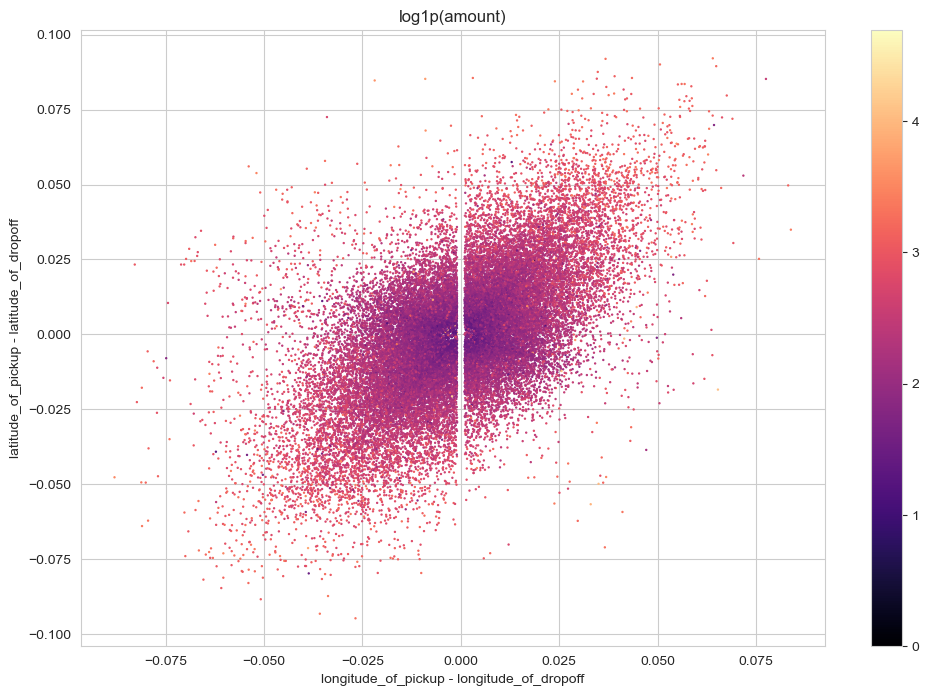

In [57]:
plt.figure(figsize=(12,8))
plt.scatter(df_train[idx_manhattan]["delta_lon"], df_train[idx_manhattan]["delta_lat"], s=0.5, alpha=1.0,
            c=np.log1p(df_train[idx_manhattan]["amount"]), cmap="magma")
plt.colorbar()
plt.xlabel('longitude_of_pickup - longitude_of_dropoff')
plt.ylabel('latitude_of_pickup - latitude_of_dropoff')
plt.title('log1p(amount)')

**Looks like direction of the trip seems to matter. Direction of a trip,
from 180 to -180 degrees. Horizontal axes = 0 degrees**

In [58]:
def calculate_direction(d_lon, d_lat):
    result = np.zeros(len(d_lon))
    l = np.sqrt(d_lon**2 + d_lat**2)
    result[d_lon>0] = (180/np.pi)*np.arcsin(d_lat[d_lon>0]/l[d_lon>0])
    idx = (d_lon<0) & (d_lat>0)
    result[idx] = 180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    idx = (d_lon<0) & (d_lat<0)
    result[idx] = -180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    return result

In [59]:
df_train['direction'] = calculate_direction(df_train.delta_lon, df_train.delta_lat)

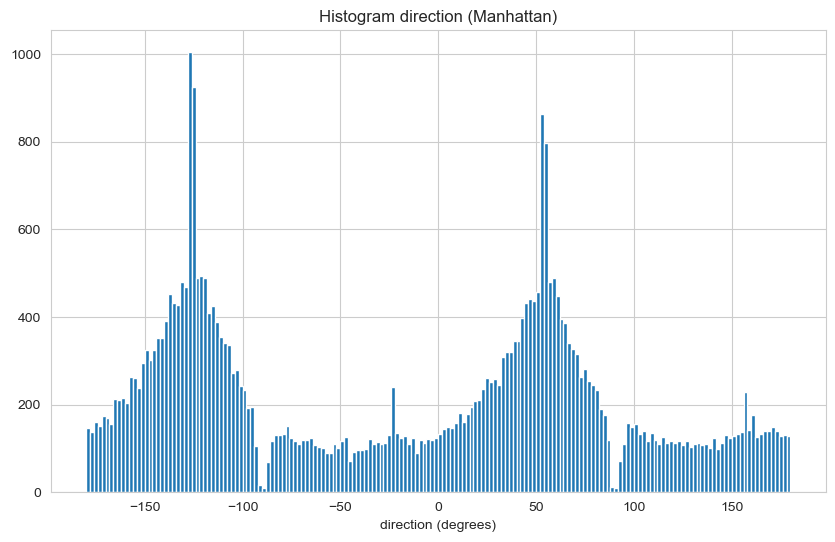

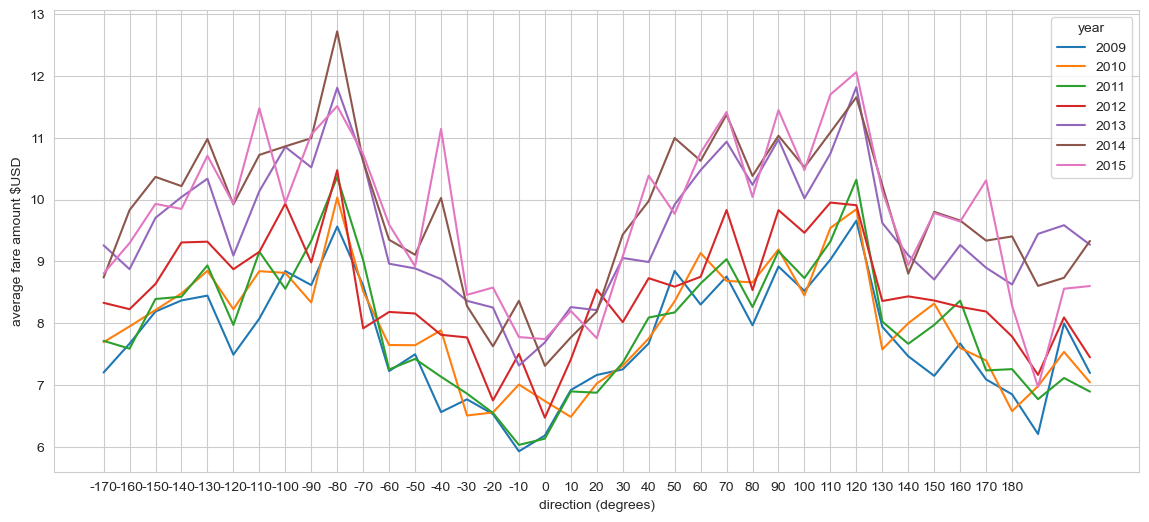

In [60]:
# plot histogram of directions
plt.figure(figsize=(10,6))
df_train[idx_manhattan].direction.hist(bins=180)
plt.xlabel('direction (degrees)')
plt.title('Histogram direction (Manhattan)')

# plot direction vs average fare amount
fig, ax = plt.subplots(1, 1, figsize=(14,6))
direc = pd.cut(df_train[idx_manhattan]['direction'], np.linspace(-180, 180, 40))

df_train[idx_manhattan].pivot_table('amount', index=[direc], columns='year', aggfunc='mean').plot(ax=ax)

plt.xlabel('direction (degrees)')
plt.xticks(range(36), np.arange(-170, 190, 10))
plt.ylabel('average fare amount $USD');

**Fare varies with pickup location**

In [61]:
# add new column to dataframe with distance in mile
df_train['distance_to_center'] = distance(nyc[1], nyc[0], df_train["latitude_of_pickup"], df_train["longitude_of_pickup"])

In [62]:
df_train.head()

unique_id  amount       date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5 2009-06-15 17:26:21+00:00           -73.844311   
1   52:16.0    16.9 2010-01-05 16:52:16+00:00           -74.016048   
2   35:00.0     5.7 2011-08-18 00:35:00+00:00           -73.982738   
3   30:42.0     7.7 2012-04-21 04:30:42+00:00           -73.987130   
4   51:00.0     5.3 2010-03-09 07:51:00+00:00           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  year  weekday  hour  distance_miles  fare_per_mile  \
0                1  2009        0    17        0.141439      31.815936   
1                1  2010        1    16        1.926284       8.773370   
2                2  2011        3     0        0.445047      12.807644   
3                1  2012        5     4        0.232303      33.146314   
4                1  2010        1     7        0.598638       8.853429   

   delta_lon  delta_lat   direction  distance_to_center  
0  -0.002701   0.009041  106.633523            8.502079  
1  -0.036780  -0.070701 -117.484306            0.543185  
2   0.008504   0.010708   51.544361            3.482099  
3   0.004437  -0.024949  -79.915791            1.654108  
4  -0.011440  -0.015754 -125.985832            4.225834

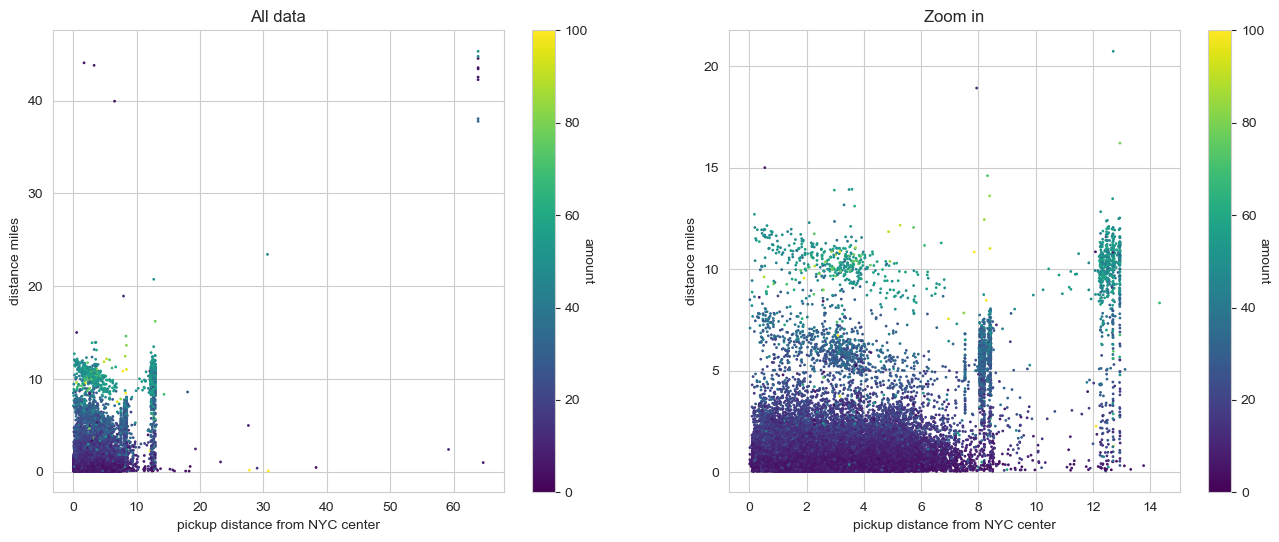

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(df_train["distance_to_center"], df_train["distance_miles"], c=np.clip(df_train["amount"], 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)

axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')

cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('amount', rotation=270)


idx = (df_train["distance_to_center"] < 15) & (df_train["distance_miles"] < 35)
im = axs[1].scatter(df_train[idx]["distance_to_center"], df_train[idx]["distance_miles"], 
                     c=np.clip(df_train[idx]["amount"], 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('amount', rotation=270);

There is a lot of 'green' dots, which is about 50 to
60 fare amount near 13 miles distance of NYC center of distrance of trip.
This could be due to trips from/to JFK airport

**Baseline Model and Submission**

In [64]:
# add new column to dataframe with distance in km
df_test['distance_miles'] = distance(df_test["latitude_of_pickup"], df_test["longitude_of_pickup"], 
                                     df_test["latitude_of_dropoff"], df_test["longitude_of_dropoff"])
df_test['distance_to_center'] = distance(nyc[1], nyc[0], df_test["latitude_of_dropoff"], df_test["longitude_of_dropoff"])
df_test['hour'] = df_test["date_time_of_pickup"].apply(lambda t: pd.to_datetime(t).hour)
df_test['year'] = df_test["date_time_of_pickup"].apply(lambda t: pd.to_datetime(t).year)
df_test['weekday'] = df_test["date_time_of_pickup"].apply(lambda t: pd.to_datetime(t).weekday())

In [65]:
df_train.head()

unique_id  amount       date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5 2009-06-15 17:26:21+00:00           -73.844311   
1   52:16.0    16.9 2010-01-05 16:52:16+00:00           -74.016048   
2   35:00.0     5.7 2011-08-18 00:35:00+00:00           -73.982738   
3   30:42.0     7.7 2012-04-21 04:30:42+00:00           -73.987130   
4   51:00.0     5.3 2010-03-09 07:51:00+00:00           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  year  weekday  hour  distance_miles  fare_per_mile  \
0                1  2009        0    17        0.141439      31.815936   
1                1  2010        1    16        1.926284       8.773370   
2                2  2011        3     0        0.445047      12.807644   
3                1  2012        5     4        0.232303      33.146314   
4                1  2010        1     7        0.598638       8.853429   

   delta_lon  delta_lat   direction  distance_to_center  
0  -0.002701   0.009041  106.633523            8.502079  
1  -0.036780  -0.070701 -117.484306            0.543185  
2   0.008504   0.010708   51.544361            3.482099  
3   0.004437  -0.024949  -79.915791            1.654108  
4  -0.011440  -0.015754 -125.985832            4.225834

In [66]:
df_test.head()

unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1   52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2   35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3   30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4   51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  distance_miles  distance_to_center  hour  year  weekday  
0                1        0.640487            8.630724    17  2009        0  
1                1        5.250670            4.897374    16  2010        1  
2                2        0.863411            2.636757     0  2011        3  
3                1        1.739386            3.132577     4  2012        5  
4                1        1.242218            5.468020     7  2010        1

In [67]:
# define dataset
# select points 15 miles near NYC center and remove zero passenger datapoints
idx = (df_train["distance_to_center"] < 15) & (df_train["no_of_passenger"] != 0)

features = ['year', 'hour', 'distance_miles', 'no_of_passenger','weekday','distance_to_center']

X = df_train[idx][features].values
y = df_train[idx]['amount'].values

In [68]:
print(X.shape, y.shape)

(46243, 6) (46243,)


In [69]:
# define some handy analysis support function
from sklearn.metrics import mean_squared_error, explained_variance_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse, evs))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

In [70]:
# create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

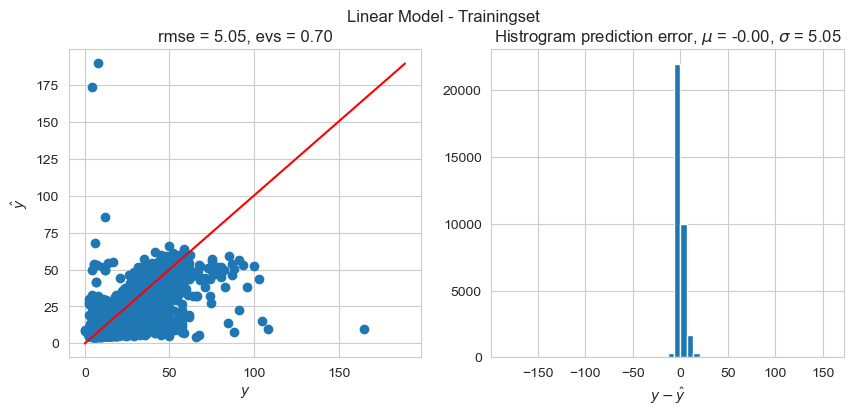

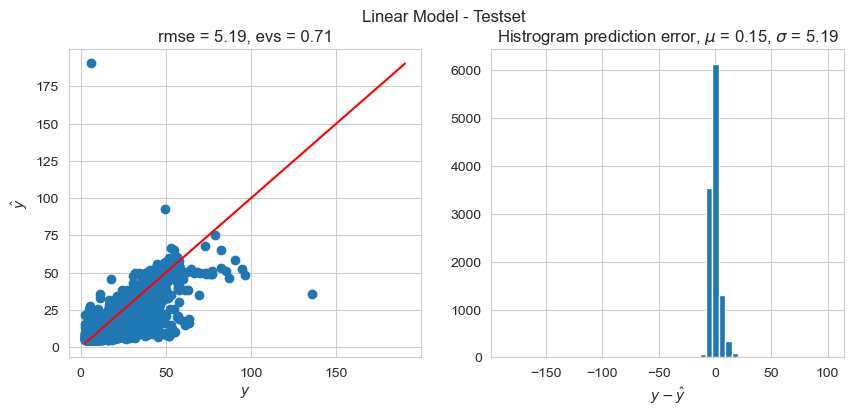

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))

model_lin.fit(X_train, y_train)

y_train_pred = model_lin.predict(X_train)

plot_prediction_analysis(y_train, y_train_pred, title='Linear Model - Trainingset')

y_test_pred = model_lin.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Linear Model - Testset')

Generate Kaggle Submission

In [72]:
# define dataset
XTEST = df_test[features].values

In [74]:
y_pred_final = model_lin.predict(XTEST)

submission = pd.DataFrame(
    {
        'key': df_test["unique_id"], 
        'amount': y_pred_final
    },
    columns = ['key', 'amount'])
submission.to_csv(r'D:\submission.csv', index = False)

In [75]:
submission.head()

key     amount
0  26:21.0   7.499972
1  52:16.0  27.299511
2  35:00.0   9.301388
3  30:42.0  13.568242
4  51:00.0  10.439606